<a href="https://colab.research.google.com/github/coco-in-bluemoon/three-minute-deep-learning-keras/blob/main/notebook/chapter5_2_lstm_airplane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

**데이터 준비**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
class DataSet:
    def __init__(self, filename, window=12):
        data = self.load_data(filename)
        x, y = self.get_xy(data, window)

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        self.x = x
        self.y = y
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test

    @staticmethod
    def load_data(filename):
        dataset = pd.read_csv(filename, usecols=[1], engine='python', skipfooter=3)
        data = dataset.values.reshape(-1)

        plt.plot(data)
        plt.xlabel('Time')
        plt.ylabel('#Passengers')
        plt.title('Original Data')
        plt.show()

        data_normalized = (data - np.mean(data)) / np.std(data) / 5
        plt.plot(data_normalized)
        plt.xlabel('Time')
        plt.ylabel('Normalized #Passengers')
        plt.title('Normalized Data by $E[]$ and $5\sigma$')
        plt.show()

        return data_normalized

    @staticmethod
    def get_xy(data, window=12):
        x_original = list()
        y_original = list()

        len_data = len(data)

        assert len_data > window

        for index in range(len_data - window - 1):
            x_original.append(data[index:index+window])
            y_original.append(data[index+window])

        x = np.array(x_original)
        x = x.reshape(x.shape[0], x.shape[1], 1)

        y = np.array(y_original)
        print(x.shape, y.shape)

        return x, y

**모델 준비**

In [4]:
from keras import layers, models

In [5]:
class RNNModel(models.Model):
    def __init__(self, input_shape):
        x = layers.Input(input_shape)
        h = layers.LSTM(10)(x)
        y = layers.Dense(1)(h)

        super(RNNModel, self).__init__(x, y)

        self.compile('adam', 'mse')
        self.summary()

**분석**

In [6]:
import seaborn as sns

In [7]:
class Machine:
    def __init__(self):
        self.data = DataSet('international-airline-passengers.csv')
        shape = self.data.x.shape[1:]
        self.model = RNNModel(shape)

    def run(self, epochs=400):
        data = self.data

        x, y = data.x, data.y
        x_train, y_train = data.x_train, data.y_train
        x_test, y_test = data.x_test, data.y_test

        model = self.model
        history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=0)

        self.plot_loss(history)
        plt.show()

        prediction = model.predict(x_test)
        print('Loss: ', model.evaluate(x_test, y_test))
        plt.plot(y_test, label='original')
        plt.plot(prediction, label='prediction')
        plt.legend(loc=0)
        plt.title('Validation Results')
        plt.show()

        prediction = model.predict(x_test).reshape(-1)
        print('Loss: ', model.evaluate(x_test, y_test))
        print(prediction.shape, y_test.shape)

        df = pd.DataFrame()
        df['Sample'] = list(range(len(y_test))) * 2
        df['Normalized #Passengers'] = np.concatenate([y_test, prediction], axis=0)
        df['Type'] = ['Original'] * len(y_test) + ['Prediction'] * len(prediction)

        plt.figure(figsize=(7, 5))
        sns.barplot(x='Sample', y='Normalized #Passengers', hue='Type', data=df)
        plt.ylabel('Normalized #Passengers')
        plt.show()

        prediction = model.predict(x)
        plt.plot(prediction, label='Prediction')
        plt.plot(y, label='Original')
        plt.legend(loc=0)
        plt.title('All Result')
        plt.show()

    @staticmethod
    def plot_loss(history):
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(['Train', 'Test'], loc=0)

In [8]:
def main():
    machine = Machine()
    machine.run(epochs=400)

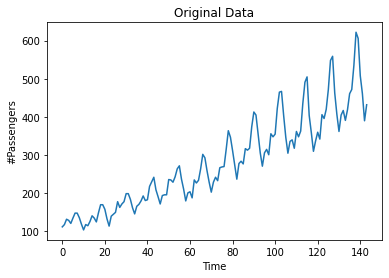

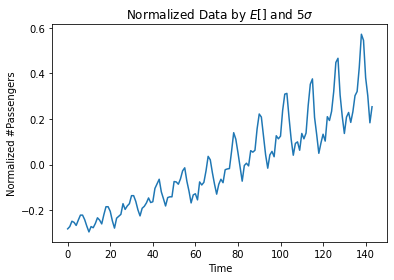

(131, 12, 1) (131,)
Model: "rnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


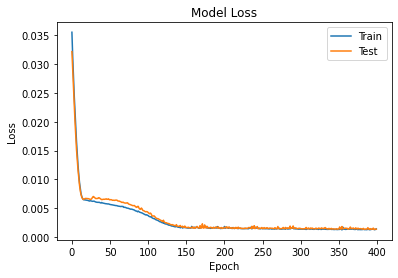

1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Loss:  0.0013824817724525928


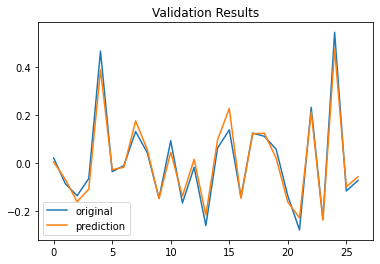

1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Loss:  0.0013824817724525928
(27,) (27,)


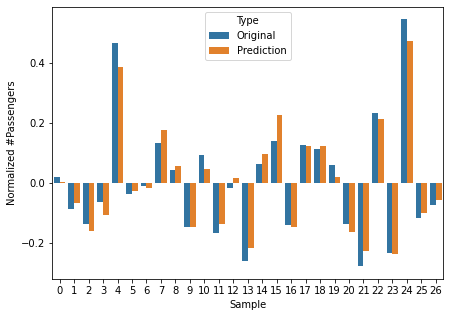

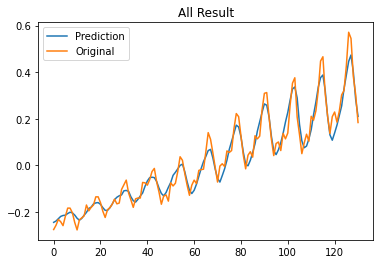

In [9]:
main()
